In [1]:
import pandas as pd
import numpy as np

import librosa
import librosa.display

import soundfile
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

from keras.models import load_model

In [2]:
def extract_features(data, sample_rate):
    result = np.array([])
    # ZCR
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

In [3]:
model = load_model("./serModel.h5")

In [4]:
import speech_recognition as sr
import pyaudio

In [5]:
r = sr.Recognizer()
mic = sr.Microphone()

In [39]:
print('Recording...')
with mic as source:
    audio = r.listen(source)

with open("audio_file.wav", "wb") as file:
    file.write(audio.get_wav_data())

Recording...


In [7]:
path_ = 'audio_file.wav'

In [8]:
scaler = StandardScaler()
encoder = OneHotEncoder()

In [9]:
Features = pd.read_csv('features.csv')
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train = scaler.fit_transform(x_train)

In [1]:
data_, sample_rate_ = librosa.load(path_)
X_ = np.array(extract_features(data_, sample_rate_))
X_ = scaler.transform(X_.reshape(1,-1))
pred_test_ = model.predict(np.expand_dims(X_, axis=2))
y_pred_ = encoder.inverse_transform(pred_test_)
print(y_pred_[0][0]) #emotion prediction

NameError: name 'librosa' is not defined

In [38]:
for value, emotion in zip(pred_test_[0], encoder.categories_[0]):
    print(emotion, f"{value:.10f}") #predicting values for each emotion

angry 0.0000000084
calm 0.0000000000
disgust 0.0000000000
fear 0.9999984503
happy 0.0000014916
neutral 0.0000000000
sad 0.0000000000
surprise 0.0000000000


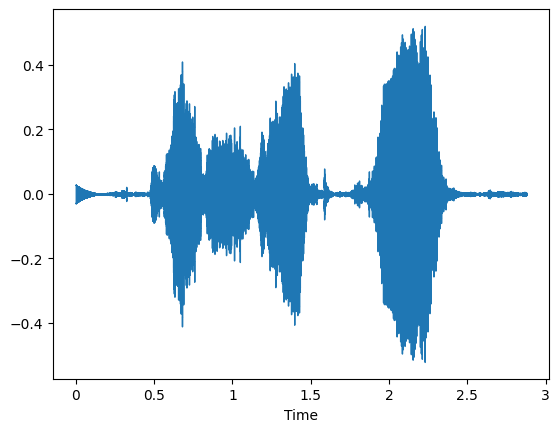

In [12]:
librosa.display.waveshow(y=data_, sr=sample_rate_)
Audio(data_, rate=sample_rate_) #for showing and listening audio